# Dirac on a Graph
## Mark Hale

In [1]:
from dirac_graph import *
from igraph import Graph
from igraph.drawing import plot
import numpy as np

np.set_printoptions(linewidth=100)

## Graph

In [2]:
g = Graph(directed=True) # track edge orientations
g.add_vertices([1,2,3,4,5,6,7])
edge_list = [(2,1),(3,1),(3,2),(4,2),(4,3),(5,3),(6,4),(6,5),(7,4)]
g.add_edges([(i-1,j-1) for i,j in edge_list])

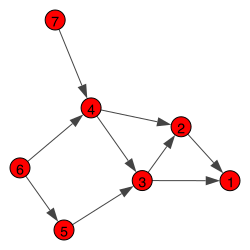

In [3]:
plot(g, bbox=(250,250), vertex_label=g.vs['name'])

## Cliques

In [4]:
clqs = cliques_by_dim(g)
for i,cs in enumerate(clqs):
    print("{0}-vertex cliques".format(i+1))
    for c in cs:
        print("\t{0}".format(', '.join([str(g.vs[v]['name']) for v in c.list])))

1-vertex cliques
	1
	2
	3
	4
	5
	6
	7
2-vertex cliques
	2, 1
	3, 1
	3, 2
	4, 2
	4, 3
	5, 3
	6, 4
	7, 4
	6, 5
3-vertex cliques
	1, 2, 3
	2, 3, 4


## Dirac

In [5]:
D = dirac(clqs)
D

array([[ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0],
       [ 1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0],
       [ 1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1],
       [ 0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  1,  0, -1, 

In [6]:
# eigenvalues
sorted(np.linalg.eigvalsh(D))

[-2.3753961553650016,
 -2.151198273048189,
 -1.9999999999999991,
 -1.7750176326074378,
 -1.6187953686167003,
 -1.4142135623730943,
 -1.0542674294351022,
 -0.9204201436418952,
 7.501183417923426e-16,
 9.402289888956834e-16,
 0.9204201436418944,
 1.0542674294351015,
 1.414213562373094,
 1.6187953686167011,
 1.7750176326074374,
 2.0,
 2.15119827304819,
 2.3753961553650034]

## Laplacian

In [7]:
L = D@D
L

array([[ 2, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  3, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1,  4, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1, -1,  4,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1, -1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0, -1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  3,  0,  0, -1, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  3,  1, -1, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 

In [8]:
# eigenvalues
sorted(np.linalg.eigvalsh(L))

[-7.140461487878708e-16,
 7.58480722778542e-16,
 0.8471732408217676,
 0.8471732408217676,
 1.1114798127676966,
 1.1114798127676977,
 1.9999999999999998,
 2.0,
 2.620498445454879,
 2.620498445454882,
 3.1506875960673124,
 3.150687596067313,
 3.9999999999999982,
 4.0,
 4.627654009965511,
 4.627654009965516,
 5.642506894922827,
 5.642506894922828]

## Cohomology

In [9]:
d = exterior_d(D)
dstar = adjoint_d(D)
L_ = [subspace(L, i, clqs) for i in range(len(clqs))]

### Direct calculation

In [10]:
# coboundary operators
d_ = [subspace(D, i+1, clqs, i) for i in range(len(clqs)-1)]

ker_ = []
im_ = []
for d_i in d_:
    im, ker = im_ker(d_i)
    im_.append(im)
    ker_.append(ker)

for i in range(len(clqs)):
    if i < len(ker_):
        dim_ker = ker_[i].shape[1]
        dim_im = im_[i-1].shape[1] if i > 0 else 0
        b = dim_ker - dim_im
    else:
        b = 0
    print("b_{0} = {1}\n".format(i, b))

b_0 = 1

b_1 = 1

b_2 = 0



### Using Hodge theory

In [11]:
cohom_groups = cohomology_groups(L_)
for i, H in enumerate(cohom_groups):
    print("b_{0} = {1}, H^{0} spanned by\n{2}\n".format(i, len(H), H))

b_0 = 1, H^0 spanned by
[array([0.37796447, 0.37796447, 0.37796447, 0.37796447, 0.37796447, 0.37796447, 0.37796447])]

b_1 = 1, H^1 spanned by
[array([ 6.56532164e-02, -6.56532164e-02, -1.31306433e-01,  1.96959649e-01,  3.28266082e-01,
       -5.25225731e-01,  5.25225731e-01, -1.11022302e-16, -5.25225731e-01])]

b_2 = 0, H^2 spanned by
[]



## Supersymmetry

In [12]:
Y = gamma(clqs)
assert np.trace(Y@L)==0

## Gravity

$$d^* \mathbf{F} = \rho$$
Let $\mathbf{F} = d V$, where $V$ is the gravitational potential, then
$$d^* d V = \rho$$
As $d^* V = 0$, have
$$L_0 V = \rho$$


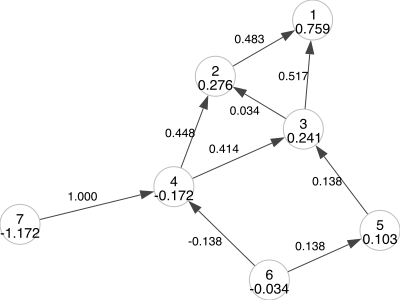

In [13]:
# put some mass on a few vertices
# cannot be in H^0 (which basically requires rho to be 0 on average)
rho = np.zeros(clqs.dim(0))
rho[0] = 1
rho[6] = -1

# uncomment to fix-up an invalid rho
# rho = remove_kernel(rho, cohom_groups[0])
# print("Corrected rho: {0}".format(rho))

for basis_vec in cohom_groups[0]:
    assert np.allclose(0, np.dot(basis_vec, rho)), "Not outside the kernel of L (H^0)"

V = np.linalg.pinv(L_[0])@rho

V_D = dirac_space(V, 0, clqs)
F = d@V_D

# sanity checks
rho_D = dirac_space(rho, 0, clqs)
assert np.allclose(rho_D, dstar@F), "F is not a solution for rho"
assert np.allclose(rho_D, dstar@d@V_D), "V is not a solution for rho"

g.vs['V'] = get_vertex_values(V, clqs)
g.es['F'] = get_edge_values(F, clqs, g)
plot(g, bbox=(400,300), vertex_label=["{0}\n{1:.3f}".format(v['name'], v['V']) for v in g.vs], edge_label=["{0:.3f}".format(e['F']) for e in g.es], vertex_size=40, vertex_color=255, vertex_frame_color='grey')


## Electromagnetism

$$d F = 0,$$
$$d^* F = \mathbf{j}$$
Let $F = d \mathbf{A}$, where $A$ is the electromagnetic potential, then
$$d^* d \mathbf{A} = \mathbf{j}$$
In the Coulomb gauge, $d^* \mathbf{A}=0$, have
$$L_1 \mathbf{A} = \mathbf{j}$$

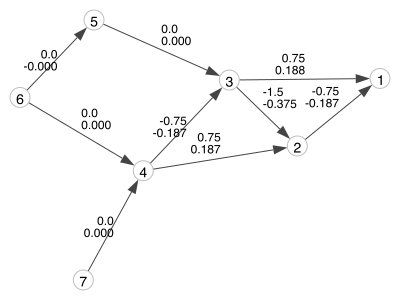

In [14]:
# setup two current loops as an example
# must be built from non-zero eigenvalue eigenvectors
j = np.zeros(clqs.dim(1))
j[0] = -0.75
j[1] = 0.75
j[2] = -1.5
j[3] = 0.75
j[4] = -0.75

# uncomment to fix-up invalid j
# j = remove_kernel(j, cohom_groups[1])
# print("Corrected j: {0}".format(j))

for basis_vec in cohom_groups[1]:
    assert np.allclose(0, np.dot(basis_vec, j)), "Not outside the kernel of L (H^1)"

A = np.linalg.pinv(L_[1])@j

A_D = dirac_space(A, 1, clqs)
F=d@A_D

# sanity checks
# verify Coulomb gauge
assert np.allclose(0, dstar@A_D), "Doesn't satisfy Coulomb gauge condition"
j_D = dirac_space(j, 1, clqs)
assert np.allclose(j_D, dstar@F), "F is not a solution for j"
assert np.allclose(j_D, dstar@d@A_D), "A is not a solution for j"

g.es['j'] = get_edge_values(j, clqs, g)
g.es['A'] = get_edge_values(A, clqs, g)
plot(g, bbox=(400,300), vertex_label=g.vs['name'], edge_label=["{0}\n{1:.3f}".format(e['j'], e['A']) for e in g.es], vertex_color=255, vertex_frame_color='grey')


In [15]:
# F 2-form values
for k, v in get_2form_values(F, clqs).items():
    print("{0}: {1}".format(', '.join([str(g.vs[i]['name']) for i in k]), v))


1, 2, 3: 0.7499999999999996
2, 3, 4: 0.7499999999999991


# References

 - The Dirac operator of a graph, Oliver Knill (https://arxiv.org/abs/1306.2166)